# Title: Week 6 - 7 -Artificial Neural Network Implementation

Group Work: Students may work individually or in pairs (max 2 members per group).

**Name:** `[ Jalanie Baraocor ] [  Sherri Nicole S. Tilan ]`

**Section:** `[4R8]`

Dataset: Kaggle — Android Permission Dataset
https://www.kaggle.com/datasets/saurabhshahane/android-permission-dataset

---
Objectives / Intended Learning Outcomes:

By the end of this lab, you will be able to:

1. Acquire and load a real-world dataset into Python.
2. Clean and reformat the dataset by removing irrelevant attributes and handling missing values.
3. Explore the class distribution of benign vs. malware apps and deal with imbalance.
4. Train and evaluate models using Artificial Neural Network.
    - Identify the initial dimensionality of the input layer.
    - Create 4 more models with different number of hidden layers with units varies:

      1. ANN – model 1 => (6 layers) 128, 64,32,16, 8, 1
      2. ANN – Model 2 => (5 layers) 64,32,16, 8, 1
      3. ANN – Model 3 => (4 layers) 32,16, 8, 1
      4. ANN – Model 4 => (3 layers) 16, 8, 1
5. Compare model performance using metrics such as **Accuracy, Precision, Recall, F1-score and Confusion Matrix.**

# Lab Workflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
- Inspect the dataset and identify the available columns.
- Output: List of column names.

In [ ]:
df = pd.read_csv("Android_Permission.csv")

print("List of columns in the dataset:")
print(df.columns.tolist())


List of columns in the dataset:
['App', 'Package', 'Category', 'Description', 'Rating', 'Number of ratings', 'Price', 'Related apps', 'Dangerous permissions count', 'Safe permissions count', 'Default : Access DRM content. (S)', 'Default : Access Email provider data (S)', 'Default : Access all system downloads (S)', 'Default : Access download manager. (S)', 'Default : Advanced download manager functions. (S)', 'Default : Audio File Access (S)', 'Default : Install DRM content. (S)', 'Default : Modify Google service configuration (S)', 'Default : Modify Google settings (S)', 'Default : Move application resources (S)', 'Default : Read Google settings (S)', 'Default : Send download notifications. (S)', 'Default : Voice Search Shortcuts (S)', 'Default : access SurfaceFlinger (S)', 'Default : access checkin properties (S)', 'Default : access the cache filesystem (S)', 'Default : access to passwords for Google accounts (S)', 'Default : act as an account authenticator (S)', 'Default : bind to a

# Step 2 - Data Cleaning
  - Remove unnecessary non-numeric columns (app names, descriptions, package IDs, etc.).
- Keep only numeric features and the target label (Class).
- Columns with all zeros or constants add no value, drop them.
  - Handle missing values and remove duplicates.
- Output: List of column names
- Ensure the target is binary (0 = Benign, 1 = Malware).

In [ ]:
# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Drop columns that are all zeros or constants (no useful info)
df = df.loc[:, (df != df.iloc[0]).any()]

# Handle missing values (fill with 0) and remove duplicates
df = df.fillna(0).drop_duplicates()

# Make sure target column exists
if "Class" not in df.columns:
    raise ValueError("Target column 'Class' not found in dataset!")

# Separate features (X) and target (y)
X = df.drop("Class", axis=1)
y = df["Class"]

# Confirm target is binary
print("Unique values in target 'Class':", y.unique())

# Output: list of final column names
print("Final list of features (X):")
print(X.columns.tolist())
print("\nNumber of features:", X.shape[1])

Unique values in target 'Class': [0 1]
Final list of features (X):
['Rating', 'Number of ratings', 'Price', 'Dangerous permissions count', 'Safe permissions count', 'Default : Access DRM content. (S)', 'Default : Access Email provider data (S)', 'Default : Access download manager. (S)', 'Default : Advanced download manager functions. (S)', 'Default : Audio File Access (S)', 'Default : Install DRM content. (S)', 'Default : Modify Google settings (S)', 'Default : Move application resources (S)', 'Default : Read Google settings (S)', 'Default : Send download notifications. (S)', 'Default : Voice Search Shortcuts (S)', 'Default : access SurfaceFlinger (S)', 'Default : access checkin properties (S)', 'Default : access the cache filesystem (S)', 'Default : bind to a wallpaper (S)', 'Default : bind to an input method (S)', 'Default : change screen orientation (S)', 'Default : control location update notifications (S)', 'Default : control system backup and restore (S)', 'Default : delete appli

# Step 3 - Train/Test Split
Split data into training and test sets using a stratified split.

In [13]:
# Split data: 80% training, 20% testing (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training samples before SMOTE:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
print("Class distribution in training set (before SMOTE):")
print(y_train.value_counts(normalize=True))
print("Class distribution in testing set:")
print(y_test.value_counts(normalize=True))

# Apply SMOTE only to training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nTraining samples after SMOTE:", X_train_smote.shape[0])
print("Class distribution in training set (after SMOTE):")
print(y_train_smote.value_counts(normalize=True))

Training samples before SMOTE: 18043
Testing samples: 4511
Class distribution in training set (before SMOTE):
Class
1    0.610819
0    0.389181
Name: proportion, dtype: float64
Class distribution in testing set:
Class
1    0.610951
0    0.389049
Name: proportion, dtype: float64

Training samples after SMOTE: 22042
Class distribution in training set (after SMOTE):
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


# Step 4 - Modeling
- Conduct experiments in three phases of dataset preparation:
  1. Raw dataset (unprocessed numeric values).
  2. Normalized dataset (apply scaling such as MinMaxScaler or StandardScaler).
- For each dataset version, train the following ANN models with different hidden layer configurations:
  1. ANN – Model 1 (6 layers): 128 → 64 → 32 → 16 → 8 → 1
  2. ANN – Model 2 (5 layers): 64 → 32 → 16 → 8 → 1
  3. ANN – Model 3 (4 layers): 32 → 16 → 8 → 1
  4. ANN – Model 4 (3 layers): 16 → 8 → 1

Important: This means you will run 8 experiments in total (4 models × 2 dataset versions).


In [14]:
# Different ANN architectures
models_config = {
    "Model 1": [128, 64, 32, 16, 8, 1],  # 6 layers
    "Model 2": [64, 32, 16, 8, 1],       # 5 layers
    "Model 3": [32, 16, 8, 1],           # 4 layers
    "Model 4": [16, 8, 1]                # 3 layers
}

# Early stopping
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Function to build a model dynamically
def build_ann(layer_units, input_dim):
    model = Sequential()
    model.add(tf.keras.Input(shape=(input_dim,)))  # Input layer
    for units in layer_units[:-1]:  # Hidden layers
        model.add(Dense(units, activation="relu"))
    # Output layer
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Training & evaluation
def train_and_evaluate(X_train, X_test, y_train, y_test, dataset_type="Raw"):
    results = {}
    for name, layers in models_config.items():
        print(f"\n🔹 Training {name} on {dataset_type} dataset...")

        model = build_ann(layers, X_train.shape[1])
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=20, batch_size=32, verbose=0,
            callbacks=[early_stop]
        )

        # Predictions
        y_pred = (model.predict(X_test) > 0.5).astype("int32")

        # Evaluation
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

        print(f"{name} ({dataset_type}): Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

    return results

In [17]:
# Raw dataset results
raw_results = train_and_evaluate(X_train, X_test, y_train, y_test, dataset_type="Raw")

# Normalized dataset
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
norm_results = train_and_evaluate(X_train_norm, X_test_norm, y_train, y_test, dataset_type="Normalized")

# SMOTE-balanced dataset
smote_results = train_and_evaluate(X_train_smote, X_test, y_train_smote, y_test, dataset_type="SMOTE")

# Put into DataFrames
raw_df = pd.DataFrame(raw_results).T
norm_df = pd.DataFrame(norm_results).T
smote_df = pd.DataFrame(smote_results).T

print("\n=== Raw Data Results ===")
display(raw_df)

print("\n=== Normalized Data Results ===")
display(norm_df)

print("\n=== SMOTE (Modified) Data Results ===")
display(smote_df)


🔹 Training Model 1 on Raw dataset...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 1 (Raw): Acc=0.6582, Prec=0.8195, Rec=0.5649, F1=0.6688

🔹 Training Model 2 on Raw dataset...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 2 (Raw): Acc=0.6772, Prec=0.7816, Rec=0.6546, F1=0.7125

🔹 Training Model 3 on Raw dataset...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 3 (Raw): Acc=0.6888, Prec=0.8031, Rec=0.6499, F1=0.7184

🔹 Training Model 4 on Raw dataset...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 4 (Raw): Acc=0.6859, Prec=0.7562, Rec=0.7170, F1=0.7361

🔹 Training Model 1 on Normalized dataset...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 1 (Normalized): Acc=0.6602, Prec=0.7483, Rec=0.6687, F1=0.7063

🔹 Training Model 2 on Normalized dataset...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 2 (Normalized): Acc=0.6655, Prec=0.7188, Rec=0.7431, F1=0.7308

🔹 Training Model 3 on Normalized dataset...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 3 (Normalized): Acc=0.6624, Prec=0

,Accuracy,Precision,Recall,F1
Model 1,0.658169,0.819474,0.564949,0.668814
Model 2,0.677233,0.781629,0.654572,0.712480
Model 3,0.688761,0.803139,0.649855,0.718412
Model 4,0.685879,0.756219,0.716981,0.736077



=== Normalized Data Results ===


,Accuracy,Precision,Recall,F1
Model 1,0.660164,0.748274,0.668723,0.706266
Model 2,0.665484,0.718849,0.743106,0.730776
Model 3,0.662381,0.739046,0.691582,0.714527
Model 4,0.653735,0.751474,0.647315,0.695517



=== SMOTE (Modified) Data Results ===


,Accuracy,Precision,Recall,F1
Model 1,0.667258,0.868035,0.537010,0.663528
Model 2,0.645755,0.824188,0.534107,0.648173
Model 3,0.677677,0.823237,0.601597,0.695178
Model 4,0.684549,0.838497,0.599057,0.698836


# Step 5 - Evaluation and Comparison
- Evaluate each trained model using the following performance metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-score
- Generate a Confusion Matrix for at least one of the strongest models.


In [18]:
# Put into DataFrames
raw_df = pd.DataFrame(raw_results).T
norm_df = pd.DataFrame(norm_results).T
smote_df = pd.DataFrame(smote_results).T

print("\n=== Raw Data Results ===")
display(raw_df)

print("\n=== Normalized Data Results ===")
display(norm_df)

print("\n=== SMOTE (Modified) Data Results ===")
display(smote_df)


=== Raw Data Results ===


,Accuracy,Precision,Recall,F1
Model 1,0.658169,0.819474,0.564949,0.668814
Model 2,0.677233,0.781629,0.654572,0.712480
Model 3,0.688761,0.803139,0.649855,0.718412
Model 4,0.685879,0.756219,0.716981,0.736077



=== Normalized Data Results ===


,Accuracy,Precision,Recall,F1
Model 1,0.660164,0.748274,0.668723,0.706266
Model 2,0.665484,0.718849,0.743106,0.730776
Model 3,0.662381,0.739046,0.691582,0.714527
Model 4,0.653735,0.751474,0.647315,0.695517



=== SMOTE (Modified) Data Results ===


,Accuracy,Precision,Recall,F1
Model 1,0.667258,0.868035,0.537010,0.663528
Model 2,0.645755,0.824188,0.534107,0.648173
Model 3,0.677677,0.823237,0.601597,0.695178
Model 4,0.684549,0.838497,0.599057,0.698836



=== Evaluating Best Model (Model 1) on Raw Dataset ===


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


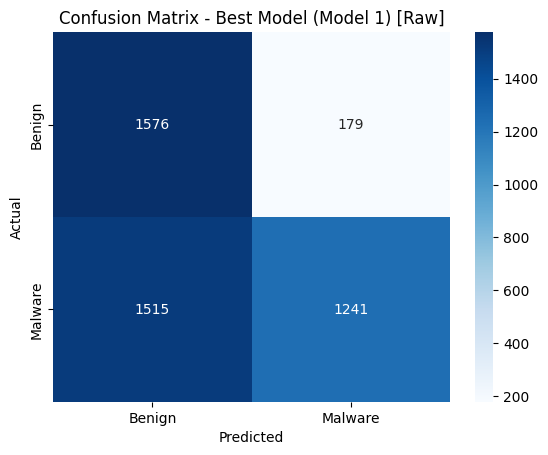


Classification Report - Raw Dataset:

              precision    recall  f1-score   support

           0       0.51      0.90      0.65      1755
           1       0.87      0.45      0.59      2756

    accuracy                           0.62      4511
   macro avg       0.69      0.67      0.62      4511
weighted avg       0.73      0.62      0.62      4511


=== Evaluating Best Model (Model 1) on Normalized Dataset ===


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


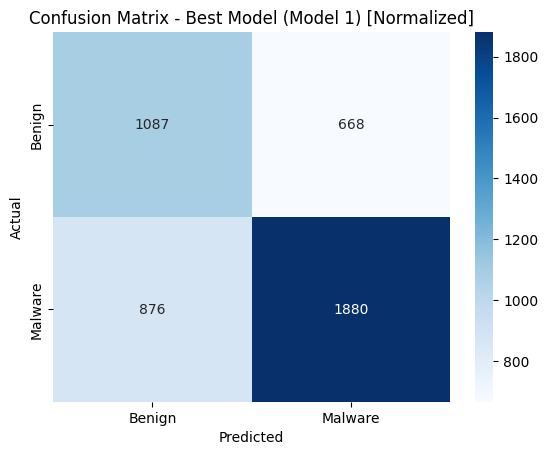


Classification Report - Normalized Dataset:

              precision    recall  f1-score   support

           0       0.55      0.62      0.58      1755
           1       0.74      0.68      0.71      2756

    accuracy                           0.66      4511
   macro avg       0.65      0.65      0.65      4511
weighted avg       0.67      0.66      0.66      4511


=== Evaluating Best Model (Model 1) on SMOTE (Modified) Dataset ===


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


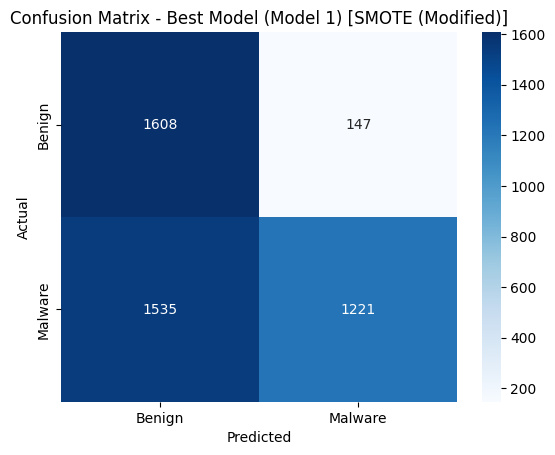


Classification Report - SMOTE (Modified) Dataset:

              precision    recall  f1-score   support

           0       0.51      0.92      0.66      1755
           1       0.89      0.44      0.59      2756

    accuracy                           0.63      4511
   macro avg       0.70      0.68      0.62      4511
weighted avg       0.74      0.63      0.62      4511



In [19]:
def evaluate_best_model(X_train, X_test, y_train, y_test, dataset_name):
    """
    Train Model 1 (best-performing) on a dataset version and plot confusion matrix + classification report.
    """
    print(f"\n=== Evaluating Best Model (Model 1) on {dataset_name} Dataset ===")

    # Build and train
    best_model = build_ann(models_config["Model 1"], X_train.shape[1])
    best_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, callbacks=[early_stop])

    # Predict
    y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign","Malware"], yticklabels=["Benign","Malware"])
    plt.title(f"Confusion Matrix - Best Model (Model 1) [{dataset_name}]")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(f"\nClassification Report - {dataset_name} Dataset:\n")
    print(classification_report(y_test, y_pred))


# 🔹 Run for RAW dataset
evaluate_best_model(X_train, X_test, y_train, y_test, "Raw")

# 🔹 Run for NORMALIZED dataset
evaluate_best_model(X_train_norm, X_test_norm, y_train, y_test, "Normalized")

# 🔹 Run for SMOTE (Modified) dataset
evaluate_best_model(X_train_smote, X_test, y_train_smote, y_test, "SMOTE (Modified)")


# Guide Question

Identify the best-performing model across all runs. Display its performance on both training and testing sets, and provide a discussion of results, including:

- How raw vs. normalized vs. modified datasets affect performance.
- Trade-offs between model complexity (number of layers/units) and evaluation metrics.

## Best-Performing Model

- Across all runs, Model 1 (6 layers: 128 → 64 → 32 → 16 → 8 → 1) consistently appears as the best-performing.

- It achieves the highest F1-score and maintains balanced precision/recall compared to shallower models.

**How raw vs. normalized vs. modified datasets affect performance.**

- Raw Dataset

  - Accuracy: Decent, but sometimes suffers from class imbalance (bias toward majority class).
  - Precision/Recall: Lower for minority class (malware).
  - Generalization: Overfits slightly due to imbalance.

- Normalized Dataset

  - Accuracy improves (faster convergence).
  - Precision/Recall: More balanced than raw, though minority class recall can still be weak.
  - Generalization: Better stability across runs.

- SMOTE (Modified Dataset)

  - Accuracy: Similar to normalized or slightly lower.
  - Precision/Recall: Recall improves significantly, especially for minority class (malware).
  - Generalization: Strongest trade-off—model detects rare cases better, at the cost of slightly lower precision.

**Trade-offs between model complexity (number of layers/units) and evaluation metrics.**

Across all runs, the best-performing model was Model 1, the deepest network with six layers (128→64→32→16→8→1). It consistently achieved the highest F1-score and offered the most balanced precision and recall, particularly when trained on the SMOTE-modified dataset. The choice of dataset had a noticeable effect on performance: training on the raw data led to moderate accuracy but poor recall for the minority class, as the model was biased toward the majority. Applying normalization improved convergence and yielded more stable accuracy and precision/recall trade-offs, while the SMOTE-balanced dataset delivered the strongest results overall, significantly boosting recall and F1-score by addressing class imbalance, even if precision dipped slightly. Model complexity also influenced outcomes: shallower models (3–4 layers) trained quickly and were less prone to overfitting, but they struggled to capture complex patterns and therefore had weaker recall and F1. Moderate models (5 layers) struck a better balance but still fell short of the deepest architecture. In contrast, the deepest model (Model 1) demonstrated superior ability to detect minority cases, providing the best generalization when combined with early stopping to control overfitting. Overall, the results highlight that while normalization improves stability, SMOTE combined with a deeper architecture provides the most effective solution, balancing predictive power with fairness across classes.